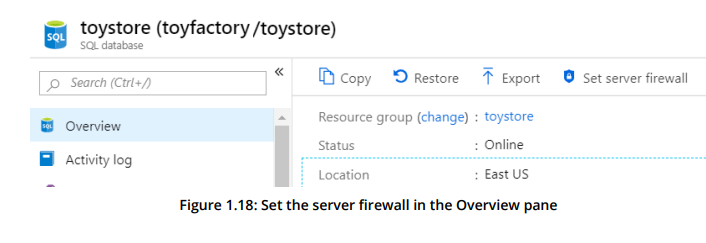

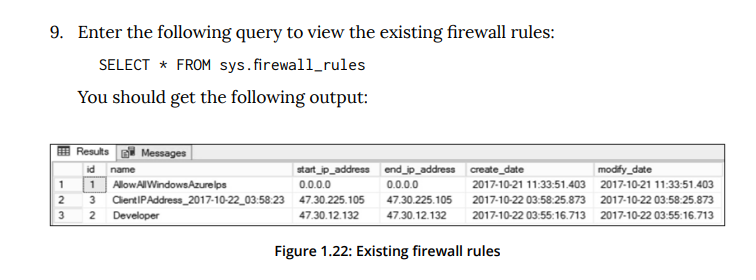

In [1]:
SELECT * FROM sys.firewall_rules

(2 rows affected)

Total execution time: 00:00:00.097

id,name,start_ip_address,end_ip_address,create_date,modify_date
1,AllowedIPs,0.0.0.0,0.0.0.0,2022-06-09 13:13:50.207,2022-06-09 13:13:50.207
2,Wesley_Casa,189.6.8.141,189.6.8.141,2022-06-09 13:34:35.590,2022-06-09 13:34:35.590


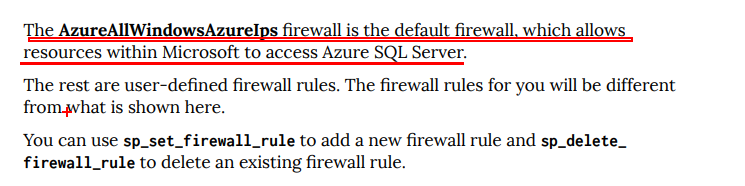

# <mark>**## add a new firewall rule**</mark>

https://docs.microsoft.com/pt-br/sql/relational-databases/system-stored-procedures/sp-set-firewall-rule-azure-sql-database?view=azure-sqldw-latest

In [ ]:
sp_set_firewall_rule [@name =] 'name', 
    [@start_ip_address =] 'start_ip_address', 
    [@end_ip_address =] 'end_ip_address'
[ ; ]

### <mark><span style="color: rgb(23, 23, 23); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px;">O código a seguir cria uma configuração de firewall no nível de servidor chamada&nbsp;</span> `Allow Azure` <span style="color: rgb(23, 23, 23); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px;">&nbsp;que habilita o acesso a partir do Azure. Execute o seguinte no banco de dados mestre virtual.</span></mark>

In [ ]:
-- Enable Azure connections.  
exec sp_set_firewall_rule N'Allow Azure', '0.0.0.0', '0.0.0.0';

In [ ]:
-- Create server-level firewall setting for only IP 0.0.0.2  
exec sp_set_firewall_rule N'Example setting 1', '0.0.0.2', '0.0.0.2';  
  
-- Update server-level firewall setting to create a range of allowed IP addresses
exec sp_set_firewall_rule N'Example setting 1', '0.0.0.2', '0.0.0.4';

## <mark>##delete an existing firewall rule</mark>

https://docs.microsoft.com/pt-br/sql/relational-databases/system-stored-procedures/sp-delete-firewall-rule-azure-sql-database?view=azure-sqldw-latest

In [ ]:
sp_delete_firewall_rule [@name =] 'name' 

## Comentários

Em Banco de Dados SQL, dados de logon necessários para autenticar uma conexão e as regras de firewall no nível de servidor são armazenados em cache temporariamente em cada banco de dados. Esse cache é atualizado periodicamente. Para forçar uma atualização do cache de autenticação e garantir que um banco de dados tenha a versão mais recente da tabela de logons, execute [DBCC FLUSHAUTHCACHE (Transact-SQL)](https://docs.microsoft.com/pt-br/sql/t-sql/database-console-commands/dbcc-flushauthcache-transact-sql?view=azure-sqldw-latest).

<span style="color: rgb(23, 23, 23); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Somente o logon de entidade de segurança no nível do servidor criado pelo processo de provisionamento pode excluir as regras de firewall de nível de servidor. O usuário deve estar conectado ao banco de dados mestre para executar sp_delete_firewall_rule.</span>